# Notebook for analysing the data from the UNHCR

Downloading the json data, inspect, silly predictions

In [1]:
import pandas as pd

import json
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 9)

In [2]:
f = open("refugee_official.json")
data = json.load(f)

In [3]:
df = pd.DataFrame(data["data"]["timeseries"])
df

,data_date,unix_timestamp,individuals
0,2022-02-24,1645660800,79209
1,2022-02-25,1645747200,179525
2,2022-02-26,1645833600,322760
3,2022-02-27,1645920000,490433
4,2022-02-28,1646006400,652445
...,...,...,...
99,2022-06-03,1654214400,7084496
100,2022-06-04,1654300800,7134281
101,2022-06-05,1654387200,7176559
102,2022-06-06,1654473600,7221827


In [4]:
df.drop("unix_timestamp", axis=1, inplace=True)
df.describe()

,individuals
count,1.040000e+02
mean,4.589606e+06
std,1.855521e+06
min,7.920900e+04
25%,3.508529e+06
50%,4.895933e+06
75%,6.058988e+06
max,7.270939e+06


Sanity check: does this look like the data on the web?

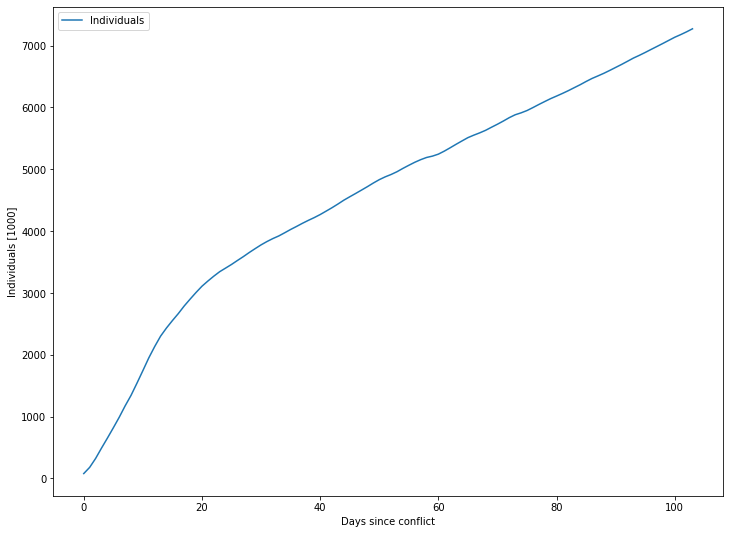

In [5]:
plt.plot(range(0, len(df)), df["individuals"]/1000, label="Individuals")
plt.xlabel("Days since conflict"); plt.ylabel("Individuals [1000]")
plt.legend(); 

In [6]:
individuals_daily = []
individuals_daily.append(df["individuals"][0])
for i in range(len(df)-1):
    c = df["individuals"][i+1] - df["individuals"][i]
    individuals_daily.append(c)

type(df["data_date"])

pandas.core.series.Series

In [7]:
s = pd.Series(individuals_daily, name="daily_individuals")

In [8]:
s

0       79209
1      100316
2      143235
3      167673
4      162012
        ...  
99      49900
100     49785
101     42278
102     45268
103     49112
Name: daily_individuals, Length: 104, dtype: int64

In [9]:
df["individuals_daily"] = s

In [10]:
df

,data_date,individuals,individuals_daily
0,2022-02-24,79209,79209
1,2022-02-25,179525,100316
2,2022-02-26,322760,143235
3,2022-02-27,490433,167673
4,2022-02-28,652445,162012
...,...,...,...
99,2022-06-03,7084496,49900
100,2022-06-04,7134281,49785
101,2022-06-05,7176559,42278
102,2022-06-06,7221827,45268


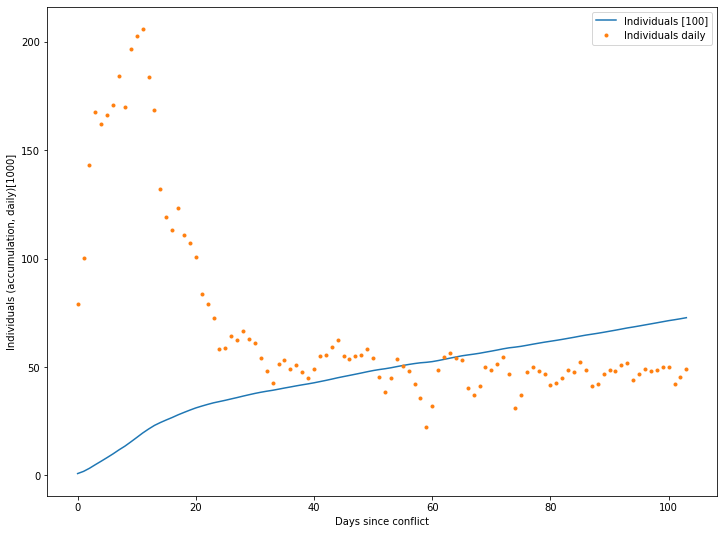

In [11]:
plt.plot(range(0, len(df)), df["individuals"]/100_000, label="Individuals [100]")
plt.plot(range(0, len(df)), df["individuals_daily"]/1000, ".", label="Individuals daily")
plt.xlabel("Days since conflict"); plt.ylabel("Individuals (accumulation, daily)[1000]")
plt.legend();

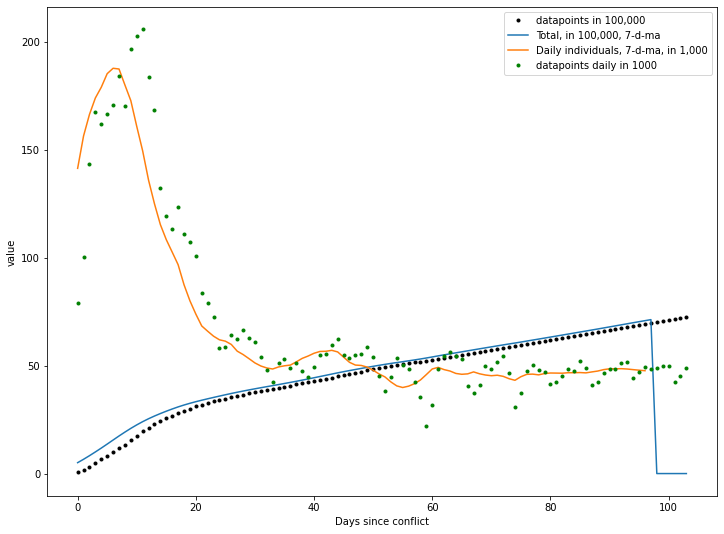

In [12]:
def moving_average(data, ma_window):
    moving_avg = data.copy()
    i = 0
    while i < len(data) - ma_window + 1:
        window = data[i : i+ma_window]
        moving_avg[i] = (sum(window)/ma_window)
        i+=1
    moving_avg[i:len(data)+1] = 0
    return moving_avg

    
w = 7
ma7_arrivals = moving_average(df["individuals_daily"], w)
ma7_individuals = moving_average(df["individuals"], w)
plt.plot(df["individuals"]/100_000, "k.", label="datapoints in 100,000")
# strong indicator of no-data, cf line 18 "-w"
plt.plot(ma7_individuals[0:len(ma7_individuals)]/100000, label="Total, in 100,000, 7-d-ma") 
plt.plot(ma7_arrivals[0:len(ma7_arrivals)-w]/1000, label="Daily individuals, 7-d-ma, in 1,000") 
plt.plot(df["individuals_daily"]/1000, "g.", label="datapoints daily in 1000")
    
plt.xlabel("Days since conflict")
plt.ylabel("value")
plt.legend()

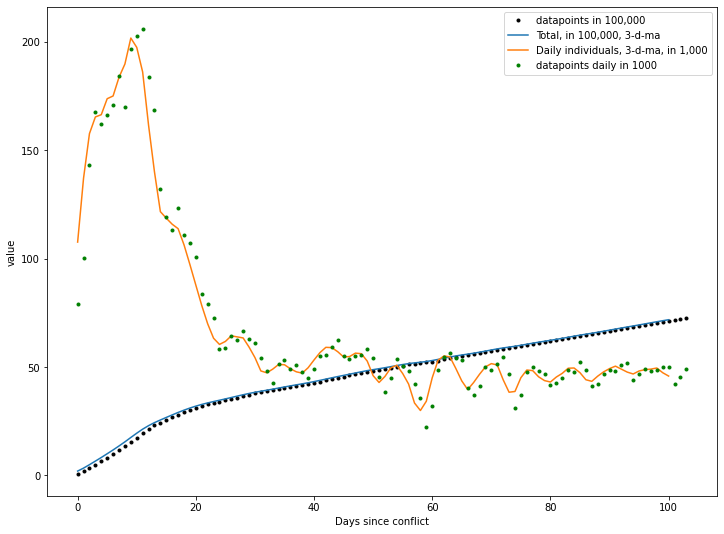

In [13]:
w = 3
ma3_new_arrivals = moving_average(df["individuals_daily"], 3)
ma3_individuals = moving_average(df["individuals"], 3)
plt.plot(df["individuals"]/100_000, "k.", label="datapoints in 100,000")
plt.plot(ma3_individuals[0:len(ma3_individuals)-w]/100000, label="Total, in 100,000, 3-d-ma")
plt.plot(ma3_new_arrivals[0:len(ma3_new_arrivals)-w]/1000, label="Daily individuals, 3-d-ma, in 1,000")
plt.plot(df["individuals_daily"]/1000, "g.", label="datapoints daily in 1000")
    
plt.xlabel("Days since conflict")
plt.ylabel("value")
plt.legend()

In [14]:
ma7_arrivals

0      141365.714286
1      156354.428571
2      166323.571429
3      173957.571429
4      178936.285714
           ...      
99          0.000000
100         0.000000
101         0.000000
102         0.000000
103         0.000000
Name: individuals_daily, Length: 104, dtype: float64